<a href="https://colab.research.google.com/github/shilpeemaitra/Lab/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [237]:
import pandas as pd # It has functions for analyzing, cleaning, exploring, and manipulating data
import numpy as np #functions provided by NumPy that allow us to create and manipulate arrays, and perform different operations on them.

Loading Dataset

In [238]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [239]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [240]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


to show the missing values

In [242]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No Missing Values

In [243]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


NO duplicate values




In [244]:
df.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


dropping unique values because they are of no use

In [245]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)


Renaming Exited to churned

In [246]:
df.rename(columns={"Exited":"Churned"},inplace=True)

replacing Churned values from 0,1 to yes/no

In [247]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [248]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [249]:
import seaborn as sns #to make statistical graphs
import matplotlib.pyplot as plt #for creating static, animated, and interactive visualizations
# Seaborn is a visualization library that is built on top of Matplotlib

scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms

In [250]:
from scipy import stats #probabilistic distributions and statistical operations
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier # rule-based approach to classification and regression problems.
from sklearn.ensemble import RandomForestClassifier #classification and regression

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [251]:
#checking outliers
zscore = stats.zscore(df[['CreditScore', 'Balance', 'EstimatedSalary']])
outliers = zscore[np.abs(zscore.values)>3]
outliers

,CreditScore,Balance,EstimatedSalary
1405,-3.016383,0.837606,0.814944
1631,-3.109504,1.221131,1.597758
1838,-3.109504,0.532858,0.408848
1962,-3.026730,1.074721,0.728058
2473,-3.099157,1.388918,1.209082
8723,-3.109504,-1.225848,0.447481
8762,-3.109504,-1.225848,0.238332
9624,-3.109504,0.554746,1.256024


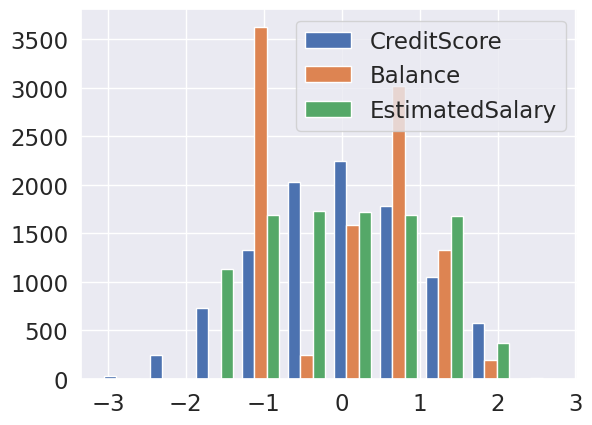

In [252]:
plt.hist(zscore)
plt.legend(zscore.columns)
plt.show()

In [253]:
def countplot(column):
    mtp.figure(figsize=(10,3))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set1")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=10)

    mtp.title(f"Customer Churned by {column}",fontweight="black",size=10,pad=10)
    mtp.show()

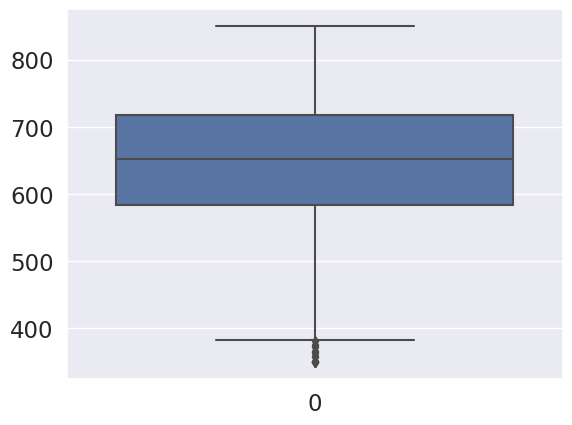

In [254]:
sns.boxplot(df.CreditScore)
plt.show()
#boxplot- used when outlier values are spread out and compare to each other

In [255]:
from sklearn.preprocessing import StandardScaler
scaling_req = []
for _ in df.columns:
    if df[_].dtype!=object and df[_].max()-df[_].min()>=10:
        scaling_req.append(_)

scaling_req

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [256]:
sc = StandardScaler()
df[scaling_req] = sc.fit_transform(df[scaling_req])

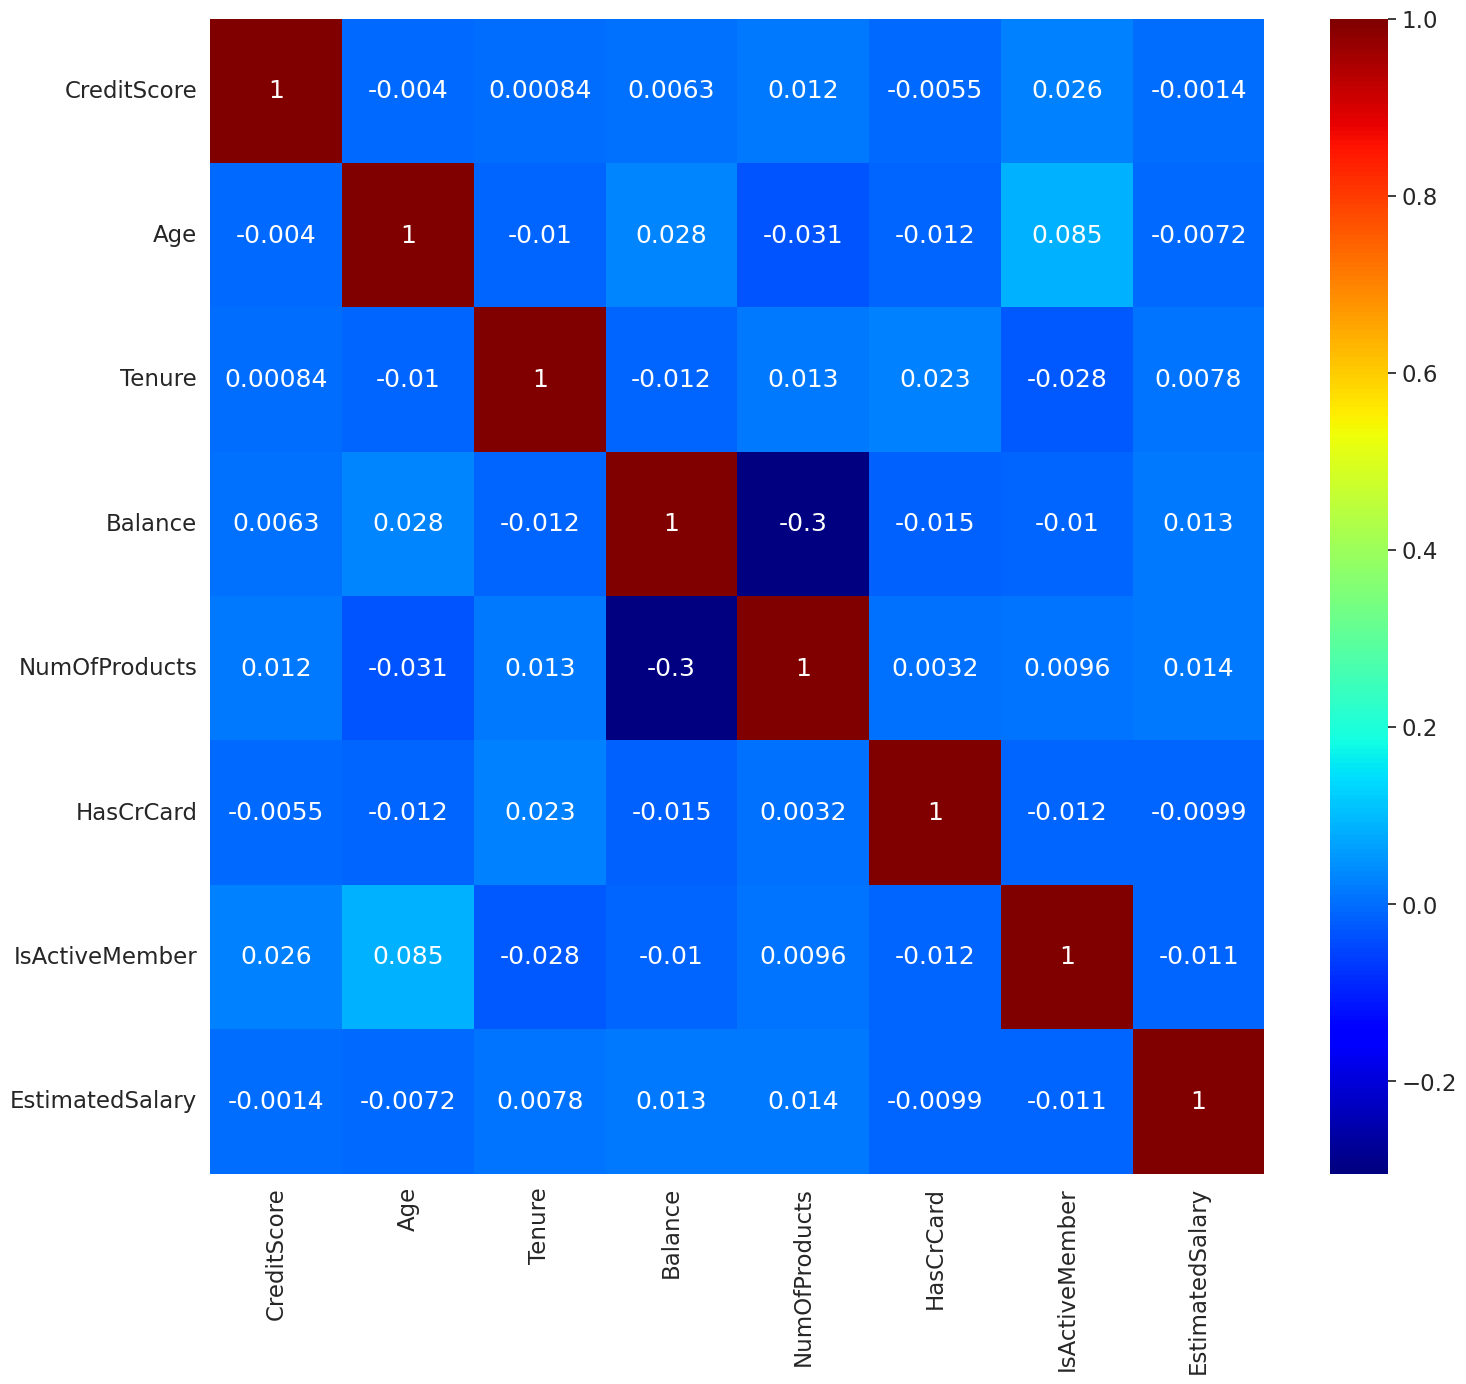

In [257]:
plt.figure(figsize=(17, 15))
sns.heatmap(df.corr(), annot=True, cmap='jet')
plt.show()

visualising customer churned by gender

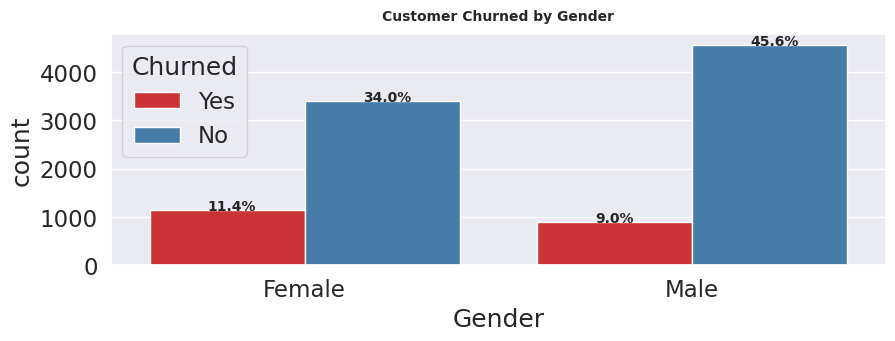

In [258]:
countplot("Gender")

Visualising customer churned by geography

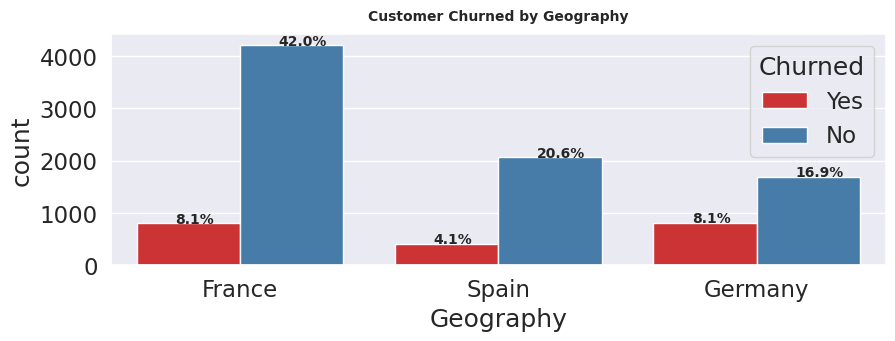

In [259]:
countplot("Geography")

Visualising customer by hascrcard

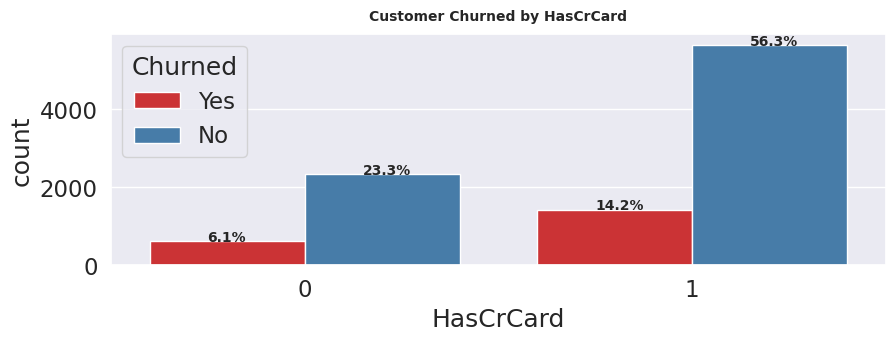

In [260]:
countplot("HasCrCard")

 Visualizing Customer Churned by "NumOfProducts".

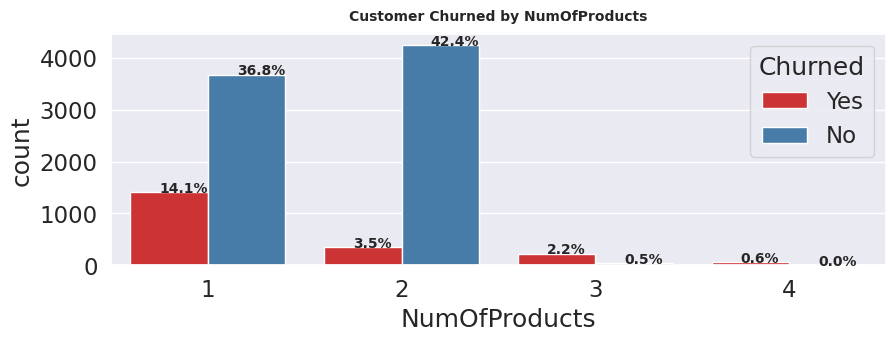

In [261]:
countplot("NumOfProducts")

visualising customer by 'IsActiveMember'

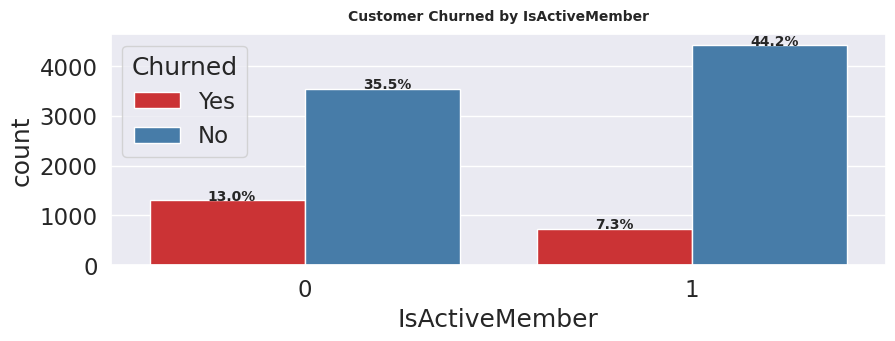

In [262]:
  countplot("IsActiveMember")

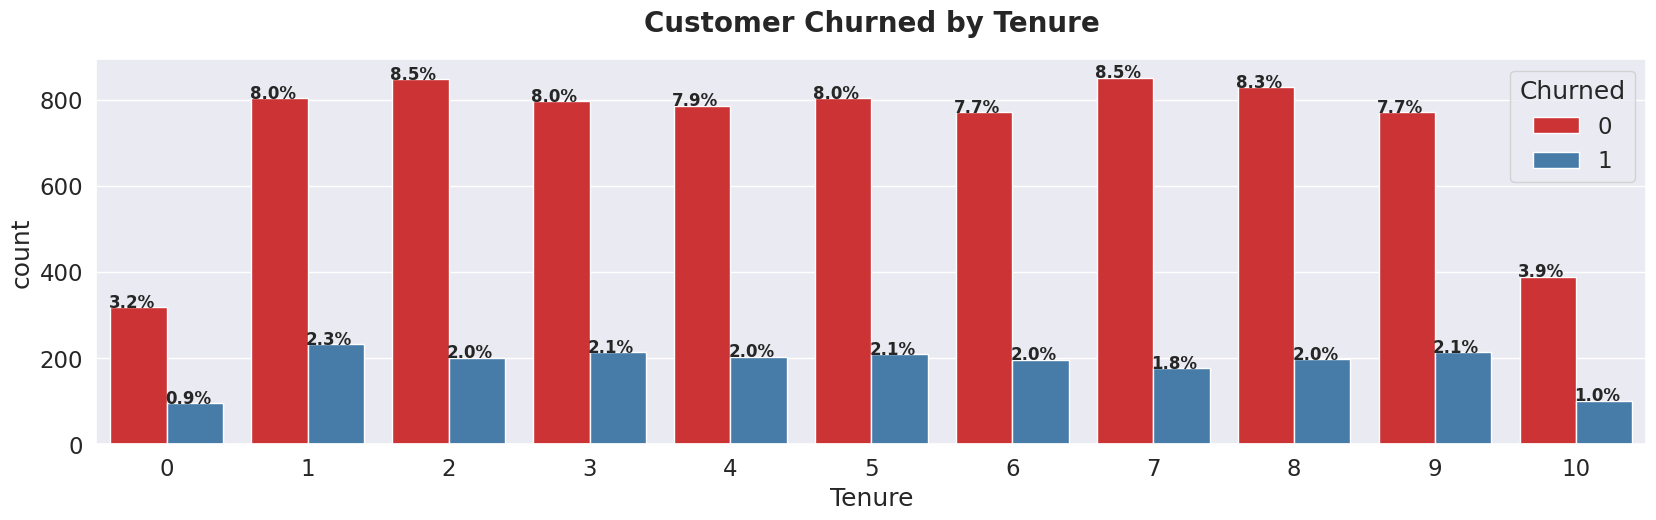

In [278]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set1")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

In [264]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

  #Label encoding is a simple and effective way to convert categorical variables into numerical form

In [265]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0


Data Scaling -
extremely high or low values (outliers) then standardization is more preferred because

In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[-0.32733113 -0.90188624 -1.09598752 ...  0.97024255  0.02403506
   1.97716468]
 [-0.44133106  1.51506738 -1.09598752 ...  0.97024255  0.2218479
  -0.50577476]
 [-1.53987591 -0.90188624 -1.09598752 ... -1.03067011  0.2454053
   1.97716468]
 ...
 [ 0.60539563 -0.90188624 -1.09598752 ...  0.97024255 -1.01734044
   1.97716468]
 [ 1.25830436  0.30659057  0.91241915 ... -1.03067011 -0.1245844
   1.97716468]
 [ 1.46557697 -0.90188624 -1.09598752 ... -1.03067011 -1.08108398
  -0.50577476]]


PCA - Principal Component Analysis

Dimentionality Reduction

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)


# pca used for reducing the dimensionality of data

PCA(n_components=2)

In [268]:
print(pca.explained_variance_)

[8334038.68992262 4515676.3473695 ]


In [269]:
pca = PCA(n_components=1)
pca.fit(df)
df_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", df_pca.shape)

original shape:    (10000, 11)
transformed shape: (10000, 1)


In [270]:
df_new = pca.inverse_transform(df_pca)

Class imbalance

In [271]:
from imblearn.over_sampling import SMOTE

In [272]:
smt = SMOTE(random_state=42)
#synthetic minority oversampling technique

In [273]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [274]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [275]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [276]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 10) (12736,)


In [277]:
y_train_resampled.value_counts().to_frame()

,Churned
0,6368
1,6368


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_0, *['Churned', 'count()', None], **{})
chart